In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import calendar
import geopy.distance

from math import log10

In [74]:
taxi = pd.read_csv('TAXI.csv')

In [75]:
taxi = taxi[(taxi.pickup_longitude > -100) & (taxi.trip_duration < 6000) & (taxi.Distance <15) & (taxi.Distance > 0.5)]

In [76]:
taxi.Distance = taxi["Distance"].apply(lambda x: log10(x))

(array([ 59757., 130578., 201265., 237174., 229810., 182070., 131177.,
         89385.,  69401.,  31653.]),
 array([-0.30102043, -0.15331049, -0.00560056,  0.14210938,  0.28981932,
         0.43752926,  0.5852392 ,  0.73294914,  0.88065908,  1.02836901,
         1.17607895]),
 <a list of 10 Patch objects>)

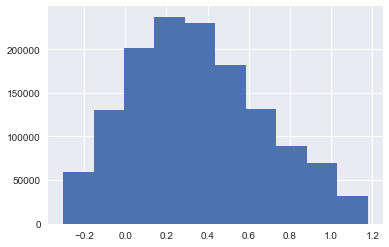

In [77]:
plt.hist(taxi.Distance)

In [3]:
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,pickup_weekday,pickup_day_time,holiday,pre_holiday,after_holiday,pickup_day_part,Part of week,season,Distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,Sunday,17,No,No,No,Day,Weekday,Spring,1.502172
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,Saturday,0,No,No,No,Late evening,Weekday,Summer,1.808660
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,Monday,11,No,No,AfterHoliday,Late morning,Weekday,Winter,6.379687
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,Tuesday,19,No,No,No,Evening,Weekday,Spring,1.483632
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,Friday,13,No,No,No,Lunch,Weekday,Spring,1.187038


In [17]:
taxi.columnsns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'pickup_month', 'pickup_weekday',
       'pickup_day_time', 'holiday', 'pre_holiday', 'after_holiday',
       'pickup_day_part', 'Part of week', 'season', 'Distance'],
      dtype='object')

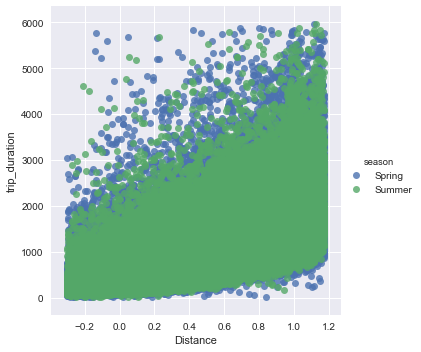

In [78]:
sns.lmplot(x = 'Distance', y = 'trip_duration', data = taxi[taxi['season']!='Winter'], fit_reg=False, hue = 'season')

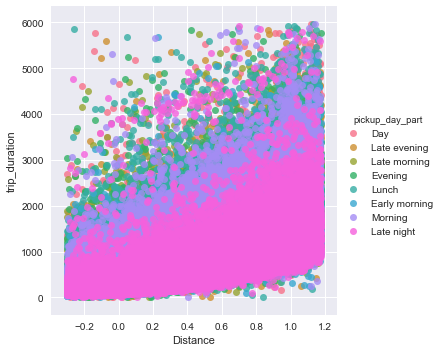

In [79]:
sns.lmplot(x = 'Distance', y = 'trip_duration', data = taxi, fit_reg=False, hue = 'pickup_day_part')

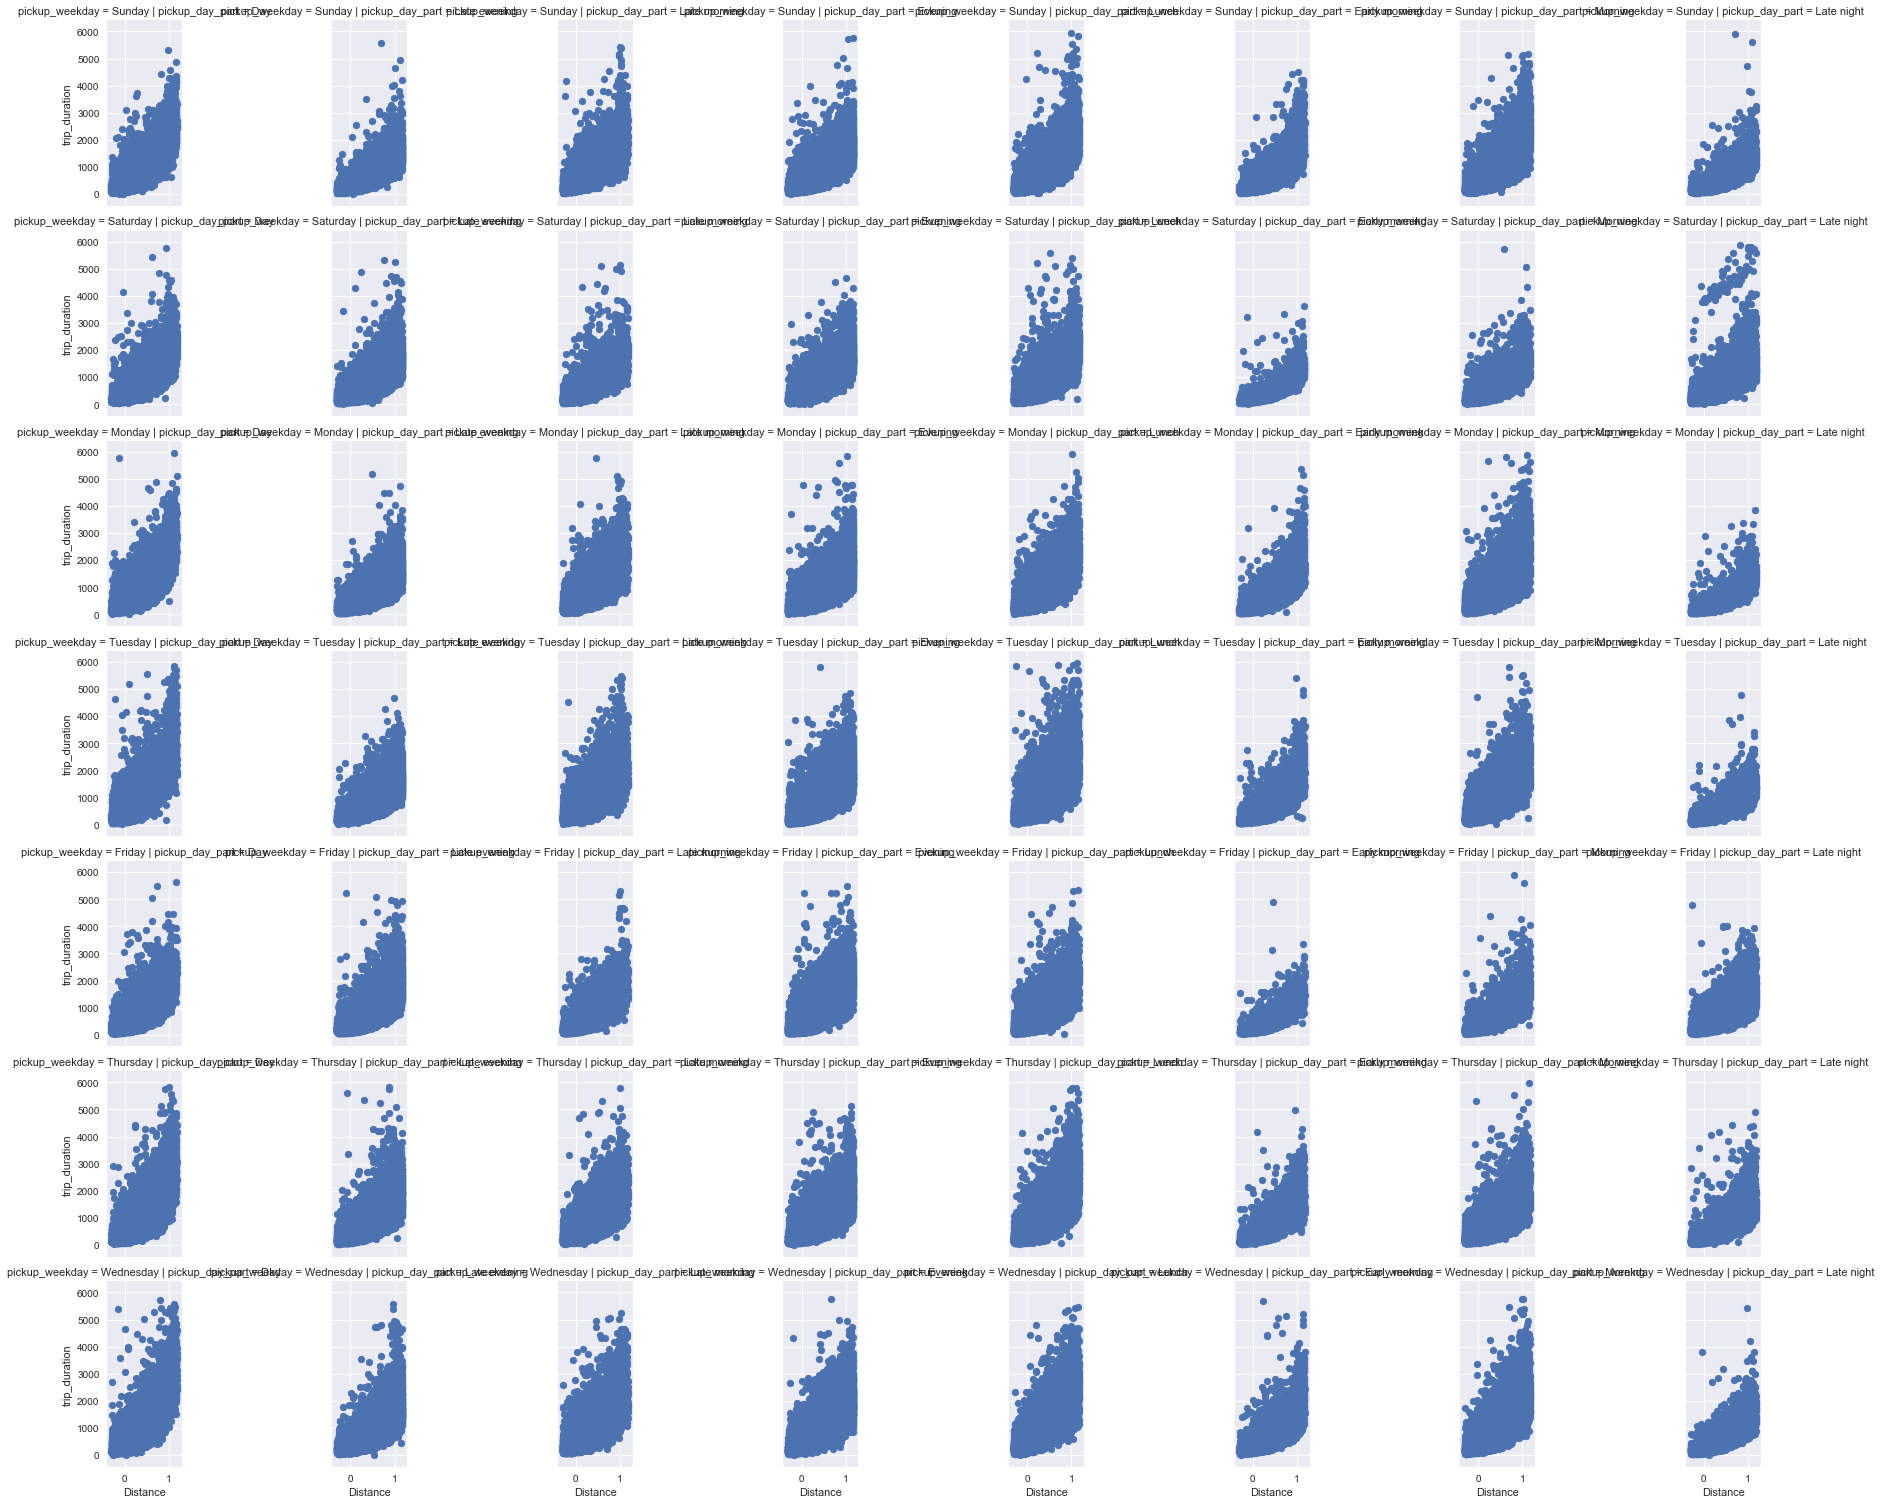

In [81]:
g = sns.FacetGrid(taxi, row = 'pickup_weekday', col = 'pickup_day_part')
kws = dict(s = 50, linewidth = 0.5, edgecolor = 'black')
g = g.map(plt.scatter, 'Distance', 'trip_duration')
#g.set(xlim = (0,100), ylim = (0,100))
g.add_legend()

In [55]:
len(taxi)

1364304

In [11]:
taxi.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,pickup_weekday,pickup_day_time,holiday,pre_holiday,after_holiday,pickup_day_part,Part of week,season,Distance
628594,id3967834,1,2016-05-01 03:10:27,2016-05-01 03:17:55,1,-74.002617,40.749920,-74.002914,40.739887,N,...,5,Saturday,3,No,No,No,Late night,Weekday,Spring,1.114399
906538,id3954300,1,2016-01-19 09:31:41,2016-01-19 09:40:28,1,-73.995865,40.748859,-73.993073,40.748779,N,...,1,Monday,9,No,No,AfterHoliday,Morning,Weekday,Winter,0.235993
411975,id1168125,2,2016-03-24 14:52:59,2016-03-24 15:12:14,1,-73.964958,40.759857,-73.988869,40.726910,N,...,3,Wednesday,14,No,No,No,Lunch,Weekday,Spring,4.179129
466045,id2926401,1,2016-06-17 21:19:49,2016-06-17 21:22:28,1,-74.001022,40.731571,-73.994148,40.741470,N,...,6,Thursday,21,No,No,No,Evening,Weekday,Summer,1.243216
79639,id1657665,2,2016-04-08 12:12:41,2016-04-08 12:57:15,1,-73.870857,40.773697,-73.973289,40.755081,N,...,4,Thursday,12,No,No,No,Late morning,Weekday,Spring,8.892403
174422,id2883691,2,2016-03-29 08:58:10,2016-03-29 09:06:50,1,-73.975334,40.777145,-73.975510,40.765377,N,...,3,Monday,8,No,No,No,Morning,Weekday,Spring,1.306952
801332,id0177466,2,2016-03-01 13:55:39,2016-03-01 14:05:54,1,-73.963928,40.757423,-73.952225,40.778069,N,...,3,Monday,13,No,No,No,Lunch,Weekday,Spring,2.496507
181157,id1657680,1,2016-01-02 22:09:57,2016-01-02 22:40:11,1,-73.802879,40.677288,-73.961555,40.762802,N,...,1,Friday,22,No,No,AfterHoliday,Late evening,Weekday,Winter,16.429062
1334029,id3581338,2,2016-06-27 13:33:47,2016-06-27 13:44:15,1,-73.953438,40.767132,-73.976639,40.743710,N,...,6,Sunday,13,No,No,No,Lunch,Weekday,Summer,3.256354
307608,id2117657,2,2016-04-30 07:40:43,2016-04-30 08:05:09,1,-73.884071,40.747650,-73.982857,40.747742,N,...,4,Friday,7,No,No,No,Early morning,Weekday,Spring,8.342946


In [40]:
taxi['Distance'].describe()

count    1.364304e+06
mean     3.001600e+00
std      2.584214e+00
min      5.000110e-01
25%      1.283217e+00
50%      2.099294e+00
75%      3.694770e+00
max      1.499957e+01
Name: Distance, dtype: float64

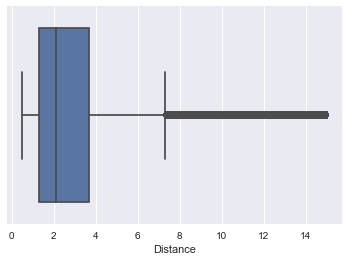

In [60]:
sns.boxplot(taxi['Distance'])